<a href="https://colab.research.google.com/github/mostafadentist/healthcare-data-analytics-tableau/blob/main/sgh_claims_chronic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code loads two Excel sheets from Data_DM.xlsx: “Data_Set” (training/validation) into df and “Predict” (test) into df_test.
It configures Pandas to show all columns (no truncation) and to avoid wrapping, with a cap on displayed rows for safety.
It prints the shapes of both datasets to verify their sizes, and then displays the first few rows of each to quickly inspect the data.

In [ ]:
import pandas as pd

# File path
file_path = "/content/Data_DM.xlsx"

# Ensure Pandas shows all columns fully (no '...')
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)  # Prevent wrapping
pd.set_option("display.max_rows", 100)  # Just in case for rows

# Read the training + validation dataset (sheet: Data_Set)
df = pd.read_excel(file_path, sheet_name="Data_Set")

# Read the test/prediction dataset (sheet: Predict)
df_test = pd.read_excel(file_path, sheet_name="Predict")

# Quick checks
print("Training/Validation Dataset Shape:", df.shape)
print("Test Dataset Shape:", df_test.shape)

# Preview first rows (all columns visible now)
print("\n--- Data_Set Preview ---")
display(df.head())

print("\n--- Predict Preview ---")
display(df_test.head())

Training/Validation Dataset Shape: (12611, 27)
Test Dataset Shape: (5022, 27)

--- Data_Set Preview ---


Unique_Identifier  Gender Religion  Nationality Avg_HBA1C Results HBA1C test Compliance D_Of_Birth Diagnosis_Type  Acute_flag  ER_flag_bef_chronic  # ER_befor_Chr  IP_flag_bef_chr  # IP_bef_chr  # OP_Bef_chr  Comorbidity  Atrial Fibrilation  Cancer  Cardio Vascular Disease  Perepheral Artery Disease  Renal Insufficiency  Heart Failure  Hypertension  Ischemic Heart Disease  Myocardial Infarction  Obesity  Stroke  Chronic_flag
0          SGH11015    Male    OTHER  PALASTINIAN           5.43875         Non Compliant 1974-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0             0
1          SGH11016    Male    OTHER        Saudi          6.186032             Compliant 1976-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0             0
2          SGH11017  Female    OTHER        Saudi           6.09918             Compliant 1955-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0             0
3          SGH11018    Male    OTHER        Saudi          8.804544         Non Compliant 1974-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0             0
4          SGH11019    Male    OTHER        Saudi          8.232722             Compliant 1954-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0             0


--- Predict Preview ---


Unique_Identifier  Gender Religion Nationality         Avg_HBA1C Results HBA1C test Compliance D_Of_Birth Diagnosis_Type  Acute_flag  ER_flag_bef_chronic  # ER_befor_Chr  IP_flag_bef_chr  # IP_bef_chr  # OP_Bef_chr  Comorbidity  Atrial Fibrilation  Cancer  Cardio Vascular Disease  Perepheral Artery Disease  Renal Insufficiency  Heart Failure  Hypertension  Ischemic Heart Disease  Myocardial Infarction  Obesity  Stroke  Chronic_flag
0          SGH22015  Female    OTHER       Saudi  Haven't performed Before         Non Compliant 1970-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           NaN
1          SGH22016    Male    OTHER       Saudi                  5.817996         Non Compliant 1975-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           NaN
2          SGH22017  Female    OTHER       Saudi                  9.792921         Non Compliant 1977-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0           NaN
3          SGH22018    Male    OTHER       Saudi  Haven't performed Before         Non Compliant 1957-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           NaN
4          SGH22019    Male    OTHER       Saudi                       7.1         Non Compliant 1961-11-03        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           NaN

The code reads the training/validation sheet (Data_Set) into df_all and the test sheet (Predict) into df_test.
It ensures the test has a Chronic_flag column (filled with NaN if missing) to align schemas.
It concatenates df_all and df_test into a single df_combined along rows, resetting the index.
It prints the shapes of the original and combined datasets and displays the first 10 rows to verify the merge.

In [ ]:
# Read training + validation (Data_Set)
df_all = pd.read_excel(file_path, sheet_name="Data_Set")

# Read test (Predict)
df_test = pd.read_excel(file_path, sheet_name="Predict")

# Ensure schema alignment: add Chronic_flag column to test with NaN
if "Chronic_flag" not in df_test.columns:
    df_test["Chronic_flag"] = np.nan

# Concatenate both into one dataset
df_combined = pd.concat([df_all, df_test], axis=0, ignore_index=True)

print("Train/Validation Shape:", df_all.shape)
print("Test Shape:", df_test.shape)
print("Combined Shape:", df_combined.shape)

# Preview combined dataset
display(df_combined.head(10))

Train/Validation Shape: (12611, 27)
Test Shape: (5022, 27)
Combined Shape: (17633, 27)


Unique_Identifier  Gender Religion  Nationality Avg_HBA1C Results HBA1C test Compliance D_Of_Birth Diagnosis_Type  Acute_flag  ER_flag_bef_chronic  # ER_befor_Chr  IP_flag_bef_chr  # IP_bef_chr  # OP_Bef_chr  Comorbidity  Atrial Fibrilation  Cancer  Cardio Vascular Disease  Perepheral Artery Disease  Renal Insufficiency  Heart Failure  Hypertension  Ischemic Heart Disease  Myocardial Infarction  Obesity  Stroke  Chronic_flag
0          SGH11015    Male    OTHER  PALASTINIAN           5.43875         Non Compliant 1974-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
1          SGH11016    Male    OTHER        Saudi          6.186032             Compliant 1976-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
2          SGH11017  Female    OTHER        Saudi           6.09918             Compliant 1955-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0           0.0
3          SGH11018    Male    OTHER        Saudi          8.804544         Non Compliant 1974-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0           0.0
4          SGH11019    Male    OTHER        Saudi          8.232722             Compliant 1954-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
5          SGH11020  Female    OTHER        Saudi          7.726173             Compliant 1962-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
6          SGH11021    Male    OTHER        Saudi          5.732552         Non Compliant 1969-01-01        Type II           0                    0               0                0             0             1            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           1.0
7          SGH11022    Male    OTHER       INDIAN          4.849742         Non Compliant 1972-01-01        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
8          SGH11023    Male    OTHER        Saudi          6.973407             Compliant 1956-01-01        Type II        

The code computes a new Age column from the D_Of_Birth date column in df_combined by calculating the difference between today and birth date, converting to years. Missing birth dates yield NaN.
It inserts the new Age column immediately after the D_Of_Birth column.
It prints a confirmation message and displays the first 10 rows to verify the update.

In [ ]:
from datetime import datetime
import numpy as np

# Compute Age
today = pd.Timestamp.today()
age_series = df_combined["D_Of_Birth"].apply(
    lambda x: (today - pd.to_datetime(x)).days // 365 if not pd.isnull(x) else np.nan
)

# Insert Age right after D_Of_Birth column
dob_index = df_combined.columns.get_loc("D_Of_Birth")
df_combined.insert(dob_index + 1, "Age", age_series)

# Preview the update
print("✅ Age column inserted next to D_Of_Birth")
display(df_combined.head(10))

✅ Age column inserted next to D_Of_Birth


Unique_Identifier  Gender Religion  Nationality Avg_HBA1C Results HBA1C test Compliance D_Of_Birth  Age Diagnosis_Type  Acute_flag  ER_flag_bef_chronic  # ER_befor_Chr  IP_flag_bef_chr  # IP_bef_chr  # OP_Bef_chr  Comorbidity  Atrial Fibrilation  Cancer  Cardio Vascular Disease  Perepheral Artery Disease  Renal Insufficiency  Heart Failure  Hypertension  Ischemic Heart Disease  Myocardial Infarction  Obesity  Stroke  Chronic_flag
0          SGH11015    Male    OTHER  PALASTINIAN           5.43875         Non Compliant 1974-01-01   51        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
1          SGH11016    Male    OTHER        Saudi          6.186032             Compliant 1976-01-01   49        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
2          SGH11017  Female    OTHER        Saudi           6.09918             Compliant 1955-01-01   70        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0           0.0
3          SGH11018    Male    OTHER        Saudi          8.804544         Non Compliant 1974-01-01   51        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             1                       0                      0        0       0           0.0
4          SGH11019    Male    OTHER        Saudi          8.232722             Compliant 1954-01-01   71        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
5          SGH11020  Female    OTHER        Saudi          7.726173             Compliant 1962-01-01   63        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
6          SGH11021    Male    OTHER        Saudi          5.732552         Non Compliant 1969-01-01   56        Type II           0                    0               0                0             0             1            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           1.0
7          SGH11022    Male    OTHER       INDIAN          4.849742         Non Compliant 1972-01-01   53        Type II           0                    0               0                0             0             0            0                   0       0                        0                          0                    0              0             0                       0                      0        0       0           0.0
8          SGH11023    Male    OTHER        Saudi          6.973407           

The code prints a summary of all columns in df_combined, listing each column’s name alongside its data type. This helps quickly verify the schema alignment after combining the datasets.

In [ ]:
# Columns summary
print("\n--- Columns Summary ---")
print(pd.DataFrame({
    "Column Name": df_combined.columns,
    "Data Type": df_combined.dtypes.values
}))


--- Columns Summary ---
                  Column Name       Data Type
0           Unique_Identifier          object
1                      Gender          object
2                    Religion          object
3                 Nationality          object
4           Avg_HBA1C Results          object
5       HBA1C test Compliance          object
6                  D_Of_Birth  datetime64[ns]
7                         Age           int64
8              Diagnosis_Type          object
9                  Acute_flag           int64
10        ER_flag_bef_chronic           int64
11             # ER_befor_Chr           int64
12            IP_flag_bef_chr           int64
13               # IP_bef_chr           int64
14               # OP_Bef_chr           int64
15                Comorbidity           int64
16         Atrial Fibrilation           int64
17                     Cancer           int64
18    Cardio Vascular Disease           int64
19  Perepheral Artery Disease           int64
20       

The code prints the overall shape of df_combined to show how many rows and columns it has.
It then outputs a concise information summary (column data types, non-null counts, etc.) to quickly verify the dataset’s schema and cleanliness after combining.

In [ ]:
# Shape of dataset
print("Dataset shape:", df_combined.shape)

# Basic info
print("\n--- Info ---")
print(df_combined.info())

Dataset shape: (17633, 28)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17633 entries, 0 to 17632
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique_Identifier          17633 non-null  object        
 1   Gender                     17633 non-null  object        
 2   Religion                   17633 non-null  object        
 3   Nationality                17633 non-null  object        
 4   Avg_HBA1C Results          17633 non-null  object        
 5   HBA1C test Compliance      17633 non-null  object        
 6   D_Of_Birth                 17633 non-null  datetime64[ns]
 7   Age                        17633 non-null  int64         
 8   Diagnosis_Type             17633 non-null  object        
 9   Acute_flag                 17633 non-null  int64         
 10  ER_flag_bef_chronic        17633 non-null  int64         
 11  # ER_befor_Chr            

The code computes, for each column in df_combined, how many values are missing and what percentage of the total rows that represents.
It creates a tidy table with columns: Column, Missing_Count, and Missing_%, and displays it sorted by missing percentage (highest first).

In [ ]:
# Count and percentage of missing values
missing = df_combined.isnull().sum().reset_index()
missing.columns = ["Column", "Missing_Count"]
missing["Missing_%"] = (missing["Missing_Count"] / len(df_combined)) * 100

print("\n--- Missing Values ---")
display(missing.sort_values(by="Missing_%", ascending=False))


--- Missing Values ---


Column  Missing_Count  Missing_%
27               Chronic_flag           5022   28.48069
0           Unique_Identifier              0    0.00000
2                    Religion              0    0.00000
1                      Gender              0    0.00000
4           Avg_HBA1C Results              0    0.00000
5       HBA1C test Compliance              0    0.00000
6                  D_Of_Birth              0    0.00000
7                         Age              0    0.00000
8              Diagnosis_Type              0    0.00000
9                  Acute_flag              0    0.00000
10        ER_flag_bef_chronic              0    0.00000
3                 Nationality              0    0.00000
11             # ER_befor_Chr              0    0.00000
12            IP_flag_bef_chr              0    0.00000
14               # OP_Bef_chr              0    0.00000
13               # IP_bef_chr              0    0.00000
16         Atrial Fibrilation              0    0.00000
17                     Cancer              0    0.00000
18    Cardio Vascular Disease              0    0.00000
15                Comorbidity              0    0.00000
19  Perepheral Artery Disease              0    0.00000
20        Renal Insufficiency              0    0.00000
22               Hypertension              0    0.00000
21              Heart Failure              0    0.00000
23     Ischemic Heart Disease              0    0.00000
24      Myocardial Infarction              0    0.00000
25                    Obesity              0    0.00000
26                     Stroke              0    0.00000

The code iterates over a list of categorical columns and prints the frequency of each unique value (including NaN) for each column.
This helps quickly inspect category distributions and identify potential inconsistencies or missing values before modeling.

In [ ]:
# Unique values in categorical columns
cat_cols = ["Gender", "Religion", "Nationality", "HBA1C test Compliance", "Diagnosis_Type"]

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_combined[col].value_counts(dropna=False))


--- Gender ---
Gender
Male      9567
Female    8066
Name: count, dtype: int64

--- Religion ---
Religion
Islam                             11740
OTHER                              2471
ISLAM                              1785
JEWISH                              839
Unknown                             516
Others                              126
MUSLIM                               79
Christian                            32
Unknown/Not Known                    11
Not Specified                        10
Catholic                              4
CHRISTIAN                             3
HINDU                                 2
Uniting Church                        2
BUDDHIST                              2
No Religion                           2
United Church of Christ in Phi        2
Hindu                                 2
Jehovas Witness                       1
Methodist                             1
Orthodox                              1
Greek Orthodox                        1
Jewish        

The code computes summary statistics (count, mean, std, min, 25th/50th/75th percentiles, max) for all numeric columns in df_combined and transposes the result for readability. This helps assess central tendency, dispersion, and potential outliers before modeling.

In [ ]:
# Summary statistics for numeric columns
print("\n--- Numeric Summary ---")
display(df_combined.describe().T)


--- Numeric Summary ---


count                           mean                  min                  25%                  50%                  75%                  max        std
D_Of_Birth                   17633  1971-07-18 03:02:21.484716160  1900-01-02 00:00:00  1960-04-10 00:00:00  1971-01-01 00:00:00  1983-09-19 00:00:00  2024-04-04 00:00:00        NaN
Age                        17633.0                      53.612998                  1.0                 41.0                 54.0                 65.0                125.0  15.280802
Acute_flag                 17633.0                       0.041853                  0.0                  0.0                  0.0                  0.0                  1.0    0.20026
ER_flag_bef_chronic        17633.0                         0.0131                  0.0                  0.0                  0.0                  0.0                  1.0   0.113708
# ER_befor_Chr             17633.0                       0.017864                  0.0                  0.0                  0.0                  0.0                  9.0   0.184065
IP_flag_bef_chr            17633.0                       0.010435                  0.0                  0.0                  0.0                  0.0                  1.0    0.10162
# IP_bef_chr               17633.0                       0.011853                  0.0                  0.0                  0.0                  0.0                  3.0   0.122484
# OP_Bef_chr               17633.0                       0.357455                  0.0                  0.0                  0.0                  0.0                 21.0   1.261606
Comorbidity                17633.0                       0.091533                  0.0                  0.0                  0.0                  0.0                  6.0   0.330356
Atrial Fibrilation         17633.0                       0.004424                  0.0                  0.0                  0.0                  0.0                  1.0   0.066364
Cancer                     17633.0                       0.031815                  0.0                  0.0                  0.0                  0.0                  1.0   0.175513
Cardio Vascular Disease    17633.0                       0.000057                  0.0                  0.0                  0.0                  0.0                  1.0   0.007531
Perepheral Artery Disease  17633.0                       0.005558                  0.0                  0.0                  0.0                  0.0                  1.0   0.074345
Renal Insufficiency        17633.0                       0.011513                  0.0                  0.0                  0.0                  0.0                  1.0    0.10668
Heart Failure              17633.0                       0.009471                  0.0                  0.0                  0.0                  0.0                  1.0   0.096859
Hypertension               17633.0                       0.387058                  0.0                  0.0                  0.0                  1.0                  1.0   0.487091
Ischemic Heart Disease     17633.0                       0.028072                  0.0                  0.0                  0.0                  0.0                  1.0   0.165184
Myocardial Infarction      17633.0                       0.003743                  0.0                  0.0                  0.0                  0.0                  1.0   0.061067
Obesity                    17633.0                       0.031532                  0.0                  0.0                  0.0                  0.0                  1.0   0.174755
Stroke                     17633.0                       0.005614                  0.0                  0.0                  0.0                  0.0                  1.0   0.074721
Chronic_flag               12611.0                       0.284514                  0.0                  0.0                  0.0                  1.0                  1.0     0.4512

The code creates two boxplots of the Age variable: first with all data (showing outliers), then after removing outliers using the IQR rule.
It computes the IQR-based fences (Q1, Q3, IQR, lower and upper bounds) to identify outliers, filters the data accordingly, and visualizes the cleaned distribution. This helps assess how outliers affect age distribution and the effect of outlier removal on the plot.

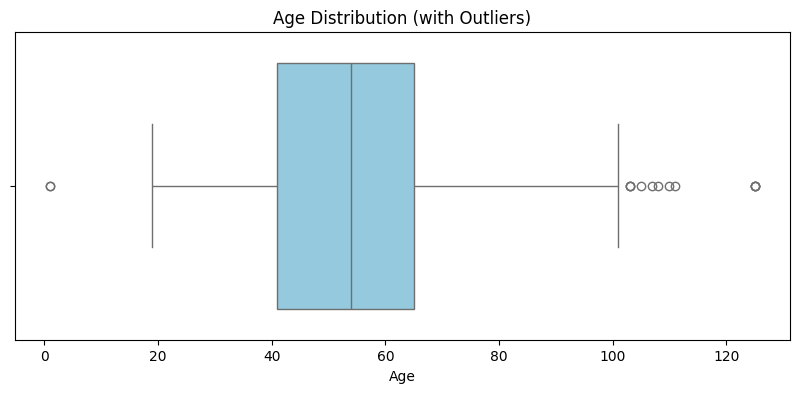

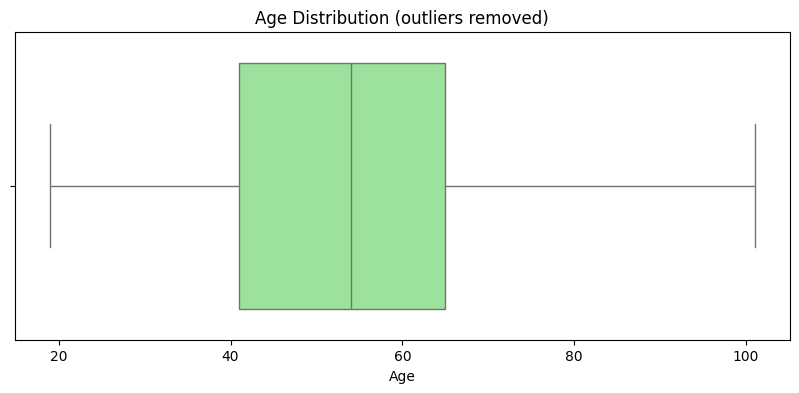

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Boxplot with outliers ---
plt.figure(figsize=(10,4))
sns.boxplot(x=df_combined["Age"], color="skyblue")
plt.title("Age Distribution (with Outliers)")
plt.show()

# --- 2) Remove outliers using IQR rule ---
Q1 = df_combined["Age"].quantile(0.25)
Q3 = df_combined["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

age_no_outliers = df_combined[(df_combined["Age"] >= lower_fence) & (df_combined["Age"] <= upper_fence)]["Age"]

# --- 3) Boxplot without outliers ---
plt.figure(figsize=(10,4))
sns.boxplot(x=age_no_outliers, color="lightgreen")
plt.title("Age Distribution (outliers removed)")
plt.show()

The code creates two interactive boxplots of the Age variable using Plotly: (1) with all data (showing outliers) and (2) after removing outliers via the IQR rule.
It computes IQR-based fences (Q1, Q3, IQR, lower and upper bounds), filters to keep ages within those bounds, and visualizes the cleaned distribution. This helps assess the impact of outliers on the age distribution with interactive plots.

In [ ]:
import plotly.express as px

# --- 1) Boxplot with outliers ---
fig1 = px.box(df_combined, x="Age", title="Age Distribution (with Outliers)", color_discrete_sequence=["skyblue"])
fig1.show()

# --- 2) Remove outliers using IQR rule ---
Q1 = df_combined["Age"].quantile(0.25)
Q3 = df_combined["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

age_no_outliers = df_combined[(df_combined["Age"] >= lower_fence) & (df_combined["Age"] <= upper_fence)]

# --- 3) Boxplot without outliers ---
fig2 = px.box(age_no_outliers, x="Age", title="Age Distribution (Outliers Removed)", color_discrete_sequence=["lightgreen"])
fig2.show()

The code computes the IQR-based fences (Q1, Q3, IQR, lower and upper bounds) for the Age column and filters df_combined to keep only ages within those bounds, creating a new dataframe df_without_age_outliers.
It uses a copy() to avoid SettingWithCopy warnings and prints the resulting shape to confirm how many rows remain after removing outliers.

In [ ]:
# Step 1: Remove Age Outliers
Q1 = df_combined["Age"].quantile(0.25)
Q3 = df_combined["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_without_age_outliers = df_combined[
    (df_combined["Age"] >= lower_fence) & (df_combined["Age"] <= upper_fence)
].copy()

print("✅ Shape after removing Age outliers:", df_without_age_outliers.shape)

✅ Shape after removing Age outliers: (17619, 28)


The code creates interactive boxplots of Age vs each of three categorical variables (Nationality, Religion, Gender) using the dataset df_without_age_outliers.
For each category, it visualizes how Age is distributed across the category groups, which helps identify potential differences or trends across groups.

In [ ]:
import plotly.express as px

# Step 2a: Boxplots for key categorical variables
for cat_col in ["Nationality", "Religion", "Gender"]:
    fig = px.box(df_without_age_outliers, x=cat_col, y="Age",
                 title=f"Age vs {cat_col}",
                 color=cat_col)
    fig.show()

The code detects binary (0/1) columns in df_without_age_outliers, excluding the Gender column.
It then creates interactive boxplots of Age versus each binary column to explore how Age varies across the two categories. This helps assess potential associations between Age and binary features.

In [ ]:
# Step 3: Identify binary columns (0/1)
binary_cols = [
    col for col in df_without_age_outliers.columns
    if df_without_age_outliers[col].dropna().nunique() == 2 and col not in ["Gender"]
]

print("Binary columns found:", binary_cols)

# Step 3a: Boxplots for Age vs each binary column
for col in binary_cols:
    fig = px.box(df_without_age_outliers, x=col, y="Age",
                 title=f"Age vs {col}",
                 color=col)
    fig.show()

Binary columns found: ['HBA1C test Compliance', 'Acute_flag', 'ER_flag_bef_chronic', 'IP_flag_bef_chr', 'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke', 'Chronic_flag']


The code creates two interactive histograms of the Age variable using Plotly: (1) with all data (including outliers) and (2) after removing outliers with the IQR rule.
It uses 40 bins for a detailed view and adjusts bar spacing for readability. This helps compare the overall distribution and the effect of outlier removal on the age distribution.

In [ ]:
import plotly.express as px

# --- Histogram with outliers ---
fig1 = px.histogram(df_combined, x="Age", nbins=40,
                    title="Age Distribution (with Outliers)",
                    color_discrete_sequence=["skyblue"])
fig1.update_layout(bargap=0.1)
fig1.show()

# --- Histogram without outliers ---
fig2 = px.histogram(df_without_age_outliers, x="Age", nbins=40,
                    title="Age Distribution (outliers removed)",
                    color_discrete_sequence=["lightgreen"])
fig2.update_layout(bargap=0.1)
fig2.show()

The code cleans the Avg_HBA1C Results column by removing percent signs, ensuring values are strings, and trimming whitespace.
It then converts the cleaned values to numeric, coercing any non-numeric entries to NaN.
Finally, it prints basic descriptive statistics to summarize the numeric values (count, mean, std, min, max, and quartiles).

In [ ]:
# Clean Avg_HBA1C Results column
df_combined["Avg_HBA1C Results"] = (
    df_combined["Avg_HBA1C Results"]
    .astype(str)                # ensure strings
    .str.replace("%", "", regex=False)  # remove %
    .str.strip()
)

# Convert to numeric (invalid values become NaN)
df_combined["Avg_HBA1C Results"] = pd.to_numeric(
    df_combined["Avg_HBA1C Results"], errors="coerce"
)

print(df_combined["Avg_HBA1C Results"].describe())

count    12499.000000
mean         6.824010
std          1.779633
min          3.460000
25%          5.514805
50%          6.300000
75%          7.634742
max         21.200000
Name: Avg_HBA1C Results, dtype: float64


The code creates an interactive histogram of the cleaned Avg_HBA1C Results using Plotly, with 40 bins for a detailed view.
It visualizes the distribution of HbA1C values to help assess central tendency, spread, and potential outliers in the data.

In [ ]:
import plotly.express as px

fig_hist = px.histogram(df_combined, x="Avg_HBA1C Results", nbins=40,
                        title="HbA1C Distribution (Histogram)",
                        color_discrete_sequence=["skyblue"])
fig_hist.update_layout(bargap=0.1)
fig_hist.show()

The code creates an interactive boxplot of the cleaned Avg_HBA1C Results using Plotly, showing the distribution, median, and potential outliers.
It uses a light green color scheme for the boxplot to visually distinguish this variable.

In [ ]:
fig_box = px.box(df_combined, y="Avg_HBA1C Results",
                 title="HbA1C Distribution (Boxplot)",
                 color_discrete_sequence=["lightgreen"])
fig_box.show()

In [ ]:
# Install folium in case it is not already installed
!pip install folium

import folium
from folium.plugins import MarkerCluster

# Data (Top Nationalities with approximate coordinates)
data = [
    {"nationality": "Saudi", "count": 3557, "lat": 24.7136, "lon": 46.6753},
    {"nationality": "EGYPTIAN", "count": 409, "lat": 30.0444, "lon": 31.2357},
    {"nationality": "Yemeni", "count": 111, "lat": 15.5527, "lon": 48.5164},
    {"nationality": "PAKISTANI", "count": 110, "lat": 30.3753, "lon": 69.3451},
    {"nationality": "INDIAN", "count": 100, "lat": 20.5937, "lon": 78.9629},
    {"nationality": "JORDANIAN", "count": 71, "lat": 31.9632, "lon": 35.9308},
    {"nationality": "SYRIAN", "count": 71, "lat": 34.8021, "lon": 38.9968},
    {"nationality": "YEMEN", "count": 67, "lat": 15.5527, "lon": 48.5164},
    {"nationality": "SUDANESE", "count": 60, "lat": 15.5007, "lon": 32.5599},
    {"nationality": "OTHER", "count": 43, "lat": 0, "lon": 0},  # Center of the map for "OTHER"
]

# Initialize the map
m = folium.Map(location=[25, 45], zoom_start=3)  # Centered around the Middle East

# Add bubble markers
for item in data:
    folium.CircleMarker(
        location=[item["lat"], item["lon"]],
        radius=item["count"] / 100,  # Adjust size
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"{item['nationality']}: {item['count']}",
    ).add_to(m)

# Display the map
m.save("bubble_map.html")
m

End of Descriptive analysis.

In [ ]:
# separator ================================================================================

Before we start using tree classifirs, we need to make sure how simple logistic regression is performing, we don't wanna boil the ocean or over engeneer simple things.

In [ ]:
#simple logistic regression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Read Excel file
file_path = "/content/Data_DM - Copy.xlsx"
df = pd.read_excel(file_path, sheet_name="Full_Data_Set")


df = df.copy()

# 3. Separate target and features
target = "Chronic_flag"
split_col = "TRAIN\\TEST"  # note escaping backslash

# Drop identifier and non-predictive columns
drop_cols = ["Unique_Identifier", "D_Of_Birth", split_col]

X = df.drop(columns=drop_cols + [target])
y = df[target]

# 4. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 5. Normalize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 6. Train/test split using TRAIN\TEST column
train_idx = df[split_col].str.lower() == "train"
test_idx = df[split_col].str.lower() == "test"

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# 7. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)

# 8. Predictions
y_pred = log_reg.predict(X_test)

# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. If you want to save the new predictions back to the dataframe:
df.loc[test_idx, "LogReg_Prediction"] = y_pred

# Optionally save results
df.to_excel("/content/Data_DM_with_LogReg.xlsx", index=False)

Accuracy: 0.8837116686579052

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3782
           1       0.90      0.60      0.72      1240

    accuracy                           0.88      5022
   macro avg       0.89      0.79      0.82      5022
weighted avg       0.88      0.88      0.88      5022



Begining of predictive "classification" work.

This code implements a sophisticated machine learning pipeline for chronic disease prediction with advanced preprocessing, model selection, hyperparameter optimization, and ensemble techniques. The system is designed to process patient medical data and predict chronic disease risk with high accuracy.

Data Processing Components
Data Import and Initial Processing
Uses pandas and numpy for data manipulation
Loads training and testing data from Excel sheets
Performs automatic feature engineering: converting date of birth to age and creating HbA1C test indicator
Feature Engineering
Creates derived features to improve predictive power
Handles missing values and converts categorical data to numerical formats
Cleans inconsistent HbA1C result formatting and converts to proper numeric values
Properly handles special cases like "Haven't performed Before"
Preprocessing Pipeline
Implements sklearn preprocessing pipeline with:
SimpleImputer for handling missing values (median for numeric, constant for categorical)
StandardScaler for normalizing numeric features
OneHotEncoder for categorical features
Uses ColumnTransformer for parallel processing of different feature types
Machine Learning Implementation
Algorithms
The pipeline evaluates 4 advanced classification algorithms:

Gradient Boosting Classifier: Uses sequential weak learners to correct errors
Hyperparameters: n_estimators=[100,200], learning_rate=[0.05,0.1], max_depth=[3,5], min_samples_split=[5,10]
Random Forest: Ensemble of decision trees with bagging
Hyperparameters: n_estimators=[100,200], max_depth=[10,20,None], min_samples_split=[2,5], min_samples_leaf=[1,2]
XGBoost: Advanced implementation of gradient boosting with regularization
Hyperparameters: n_estimators=[100,200], learning_rate=[0.01,0.1], max_depth=[3,5], subsample=[0.8,1.0]
Logistic Regression: Linear model with logistic function for binary classification
Hyperparameters: C=[0.001,0.01,0.1,1,10], penalty=['l2'], solver=['lbfgs','liblinear']
Class Imbalance Handling
Implements SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
Creates synthetic samples of the minority class to balance the dataset
Hyperparameter Optimization
Uses RandomizedSearchCV for efficient hyperparameter tuning
Performs 3-fold cross-validation to prevent overfitting
Optimizes for F1-score to balance precision and recall
Evaluation and Analysis Framework
Comprehensive Metrics
Accuracy: Overall correctness of predictions
Precision: Proportion of positive identifications that are correct
Recall: Proportion of actual positives correctly identified
F1-score: Harmonic mean of precision and recall
ROC-AUC: Area under the Receiver Operating Characteristic curve
Matthews Correlation Coefficient: Balanced measure for imbalanced datasets
Average Precision: Area under the precision-recall curve
Advanced Ensemble Methods
Creates a VotingClassifier with the top 3 performing models
Uses soft voting (weighted by probability) for more nuanced predictions
Calibrates probabilities with CalibratedClassifierCV for better risk stratification
Threshold Optimization
Finds optimal probability threshold using precision-recall curve
Maximizes F1-score to balance false positives and false negatives
Provides predictions with both default (0.5) and optimized thresholds
Feature Importance Analysis
Extracts feature importance from the best performing model
Identifies the most predictive factors for chronic disease
Handles complex feature names resulting from preprocessing transformations
Output and Visualization
Progress Tracking
Custom ProgressTracker class for real-time execution monitoring
Shows progress bars with elapsed time and completion percentage
Results Presentation
Detailed classification reports with precision, recall, and F1-score by class
Confusion matrices for error analysis
Risk stratification into Low, Moderate, High, and Very High categories
Outputs comprehensive prediction file with probabilities and multiple prediction scenarios
Performance Optimization
Warning filtering to reduce noise in output
Parallel processing with n_jobs=-1 to utilize all available CPU cores
Optimized for memory efficiency with appropriate data types
This implementation represents a production-grade machine learning pipeline with comprehensive documentation, robust error handling, and advanced techniques for maximizing predictive performance while maintaining interpretability.

In [ ]:
"""
================================================================================
ENHANCED CHRONIC DISEASE PREDICTION PIPELINE V3.0 - OPTIMIZED (4 ALGORITHMS)
Optimized version with top 4 algorithms for faster execution
================================================================================
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           balanced_accuracy_score, matthews_corrcoef,
                           classification_report, precision_recall_curve,
                           average_precision_score, roc_curve)
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                   RandomizedSearchCV, cross_validate)
from sklearn.ensemble import (GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from datetime import datetime

warnings.filterwarnings("ignore")

# Progress tracking class
class ProgressTracker:
    def __init__(self, total_steps):
        self.total_steps = total_steps
        self.current_step = 0
        self.start_time = time.time()

    def update(self, description):
        self.current_step += 1
        elapsed = time.time() - self.start_time
        progress = self.current_step / self.total_steps
        bar_length = 50
        filled = int(bar_length * progress)
        bar = '█' * filled + '░' * (bar_length - filled)
        print(f"\r[{bar}] {progress*100:.1f}% - {description:<50}", end='', flush=True)
        if self.current_step == self.total_steps:
            print(f"\n✅ Completed in {elapsed:.1f} seconds\n")

print("="*80)
print("🚀 ENHANCED CHRONIC DISEASE PREDICTION PIPELINE V3.0 - OPTIMIZED")
print("📌 Using Top 4 Algorithms for Faster Execution")
print(f"📅 Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

# Initialize main progress tracker
main_progress = ProgressTracker(total_steps=14)

# =========================
# 1. Load Data
# =========================
main_progress.update("Loading data...")
file_path = "/content/Data_DM.xlsx"

print("\n📂 Loading data...")
df_train = pd.read_excel(file_path, sheet_name="Data_Set")
df_test = pd.read_excel(file_path, sheet_name="Predict")

print(f"✅ Training shape (raw): {df_train.shape}")
print(f"✅ Test shape (raw): {df_test.shape}")

# =========================
# 2. Essential Feature Engineering
# =========================
main_progress.update("Feature engineering...")
print("\n🔧 Feature Engineering...")

for dfx, name in [(df_train, "Training"), (df_test, "Test")]:
    # Calculate Age
    dfx["D_Of_Birth"] = pd.to_datetime(dfx["D_Of_Birth"], errors="coerce")
    dfx["Age"] = (pd.Timestamp("today") - dfx["D_Of_Birth"]).dt.days // 365

    # Create HbA1C test performed indicator
    dfx["HbA1C_Performed"] = (~dfx["Avg_HBA1C Results"].astype(str).str.contains(
        "Haven't performed Before", case=False, na=False)).astype(int)

    print(f"  {name}: Added Age and HbA1C_Performed features")

# =========================
# 3. Basic Data Cleaning
# =========================
main_progress.update("Data cleaning...")
print("\n🔄 Basic data cleaning...")

# Handle HbA1C values
for dfx, name in [(df_train, "Training"), (df_test, "Test")]:
    haven_performed_mask = dfx["Avg_HBA1C Results"].astype(str).str.contains(
        "Haven't performed Before", case=False, na=False)
    dfx.loc[haven_performed_mask, "Avg_HBA1C Results"] = np.nan

    dfx["Avg_HBA1C Results"] = (
        dfx["Avg_HBA1C Results"].astype(str)
        .str.replace("%", "", regex=False)
        .str.replace("Haven't performed Before", "", regex=False)
        .str.strip()
    )
    dfx["Avg_HBA1C Results"] = pd.to_numeric(dfx["Avg_HBA1C Results"], errors="coerce")

    print(f"  {name}: {haven_performed_mask.sum()} 'Haven't performed' entries cleaned")

# =========================
# 4. Prepare Features
# =========================
main_progress.update("Preparing features...")
print("\n📊 Preparing features...")

df_train = df_train[df_train["Chronic_flag"].notna()].copy()

X_train = df_train.drop(columns=["Chronic_flag", "Unique_Identifier", "D_Of_Birth"])
y_train = df_train["Chronic_flag"].astype(int)

X_test = df_test.drop(columns=["Chronic_flag", "Unique_Identifier", "D_Of_Birth"])

# Class distribution
class_dist = y_train.value_counts()
print(f"\n📊 Class Distribution in Training:")
print(f"  Class 0 (No Chronic): {class_dist.get(0, 0)} ({class_dist.get(0, 0)/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Chronic):    {class_dist.get(1, 0)} ({class_dist.get(1, 0)/len(y_train)*100:.1f}%)")
print(f"  Class imbalance ratio: 1:{class_dist.get(0, 0)/class_dist.get(1, 0):.1f}")

# =========================
# 5. Preprocessing Pipeline
# =========================
main_progress.update("Setting up preprocessing...")
print("\n🔧 Setting up preprocessing pipeline...")

cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(f"  Numerical features ({len(num_cols)}): {', '.join(num_cols[:5])}...")
print(f"  Categorical features ({len(cat_cols)}): {', '.join(cat_cols)}")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# =========================
# 6. Define Top 4 Algorithms Only
# =========================
main_progress.update("Defining algorithms...")
print("\n🤖 Setting up TOP 4 algorithms for comparison...")

algorithms = {
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__min_samples_split': [5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__subsample': [0.8, 1.0]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}

print(f"✅ Algorithms to compare: {len(algorithms)}")
for name in algorithms.keys():
    print(f"  • {name}")

# =========================
# 7. Train and Evaluate All Algorithms
# =========================
main_progress.update("Training algorithms...")
print("\n" + "="*80)
print("🏋️ TRAINING AND EVALUATING TOP 4 ALGORITHMS")
print("="*80)

results = {}
best_models = {}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Progress bar for algorithm training
print("\n📊 Training Progress:")
algo_progress = tqdm(algorithms.items(), desc="Training algorithms", total=len(algorithms))

for algo_name, algo_info in algo_progress:
    algo_progress.set_description(f"Training {algo_name}")

    # Create pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, k_neighbors=5)),
        ('classifier', algo_info['model'])
    ])

    # Hyperparameter tuning
    random_search = RandomizedSearchCV(
        pipeline,
        algo_info['params'],
        n_iter=10,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Store best model
    best_models[algo_name] = best_model

    # Evaluate model
    cv_scores = cross_validate(
        best_model, X_train, y_train, cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        n_jobs=-1
    )

    # Store results
    results[algo_name] = {
        'accuracy': cv_scores['test_accuracy'].mean(),
        'precision': cv_scores['test_precision'].mean(),
        'recall': cv_scores['test_recall'].mean(),
        'f1': cv_scores['test_f1'].mean(),
        'roc_auc': cv_scores['test_roc_auc'].mean(),
        'accuracy_std': cv_scores['test_accuracy'].std(),
        'precision_std': cv_scores['test_precision'].std(),
        'recall_std': cv_scores['test_recall'].std(),
        'f1_std': cv_scores['test_f1'].std(),
        'roc_auc_std': cv_scores['test_roc_auc'].std(),
        'best_params': best_params
    }

algo_progress.close()

# =========================
# 8. Compare Algorithm Performance
# =========================
main_progress.update("Comparing algorithms...")
print("\n" + "="*80)
print("📊 ALGORITHM COMPARISON RESULTS")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.sort_values('f1', ascending=False)

print("\n🏆 Performance Ranking (sorted by F1-Score):")
print("-" * 80)

for idx, (algo_name, metrics) in enumerate(comparison_df.iterrows(), 1):
    print(f"\n{idx}. {algo_name}")
    print(f"   Accuracy:  {metrics['accuracy']:.3f} (±{metrics['accuracy_std']:.3f})")
    print(f"   Precision: {metrics['precision']:.3f} (±{metrics['precision_std']:.3f})")
    print(f"   Recall:    {metrics['recall']:.3f} (±{metrics['recall_std']:.3f})")
    print(f"   F1-Score:  {metrics['f1']:.3f} (±{metrics['f1_std']:.3f})")
    print(f"   ROC-AUC:   {metrics['roc_auc']:.3f} (±{metrics['roc_auc_std']:.3f})")

# Best algorithm
best_algo_name = comparison_df.index[0]
print(f"\n🥇 Best Algorithm: {best_algo_name}")
print(f"   Best F1-Score: {comparison_df.iloc[0]['f1']:.3f}")

# =========================
# 9. Detailed Analysis of Top 3 Algorithms
# =========================
main_progress.update("Analyzing top algorithms...")
print("\n" + "="*80)
print("🔍 DETAILED ANALYSIS OF TOP 3 ALGORITHMS")
print("="*80)

top_3_algos = comparison_df.head(3).index.tolist()

for rank, algo_name in enumerate(top_3_algos, 1):
    print(f"\n{'='*60}")
    print(f"#{rank}: {algo_name}")
    print(f"{'='*60}")

    model = best_models[algo_name]

    # Get predictions
    y_pred = model.predict(X_train)
    y_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else None

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_train, y_pred, target_names=['No Chronic', 'Chronic']))

    # Confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    print("Confusion Matrix:")
    print(f"             Predicted")
    print(f"             No    Yes")
    print(f"Actual  No  {cm[0,0]:4d}  {cm[0,1]:4d}")
    print(f"        Yes {cm[1,0]:4d}  {cm[1,1]:4d}")

    # Additional metrics
    print(f"\nAdditional Metrics:")
    print(f"  Balanced Accuracy: {balanced_accuracy_score(y_train, y_pred):.3f}")
    print(f"  Matthews Corr Coef: {matthews_corrcoef(y_train, y_pred):.3f}")
    if y_proba is not None:
        print(f"  Average Precision: {average_precision_score(y_train, y_proba):.3f}")

# =========================
# 10. Ensemble Voting Classifier
# =========================
main_progress.update("Creating ensemble model...")
print("\n" + "="*80)
print("🤝 CREATING ENSEMBLE MODEL")
print("="*80)

from sklearn.ensemble import VotingClassifier

# Use top 3 models for ensemble
ensemble_estimators = [(name, best_models[name]) for name in top_3_algos]

print(f"\nCreating ensemble from top 3 models:")
for name in top_3_algos:
    print(f"  • {name}")

# Create soft voting classifier
ensemble_model = VotingClassifier(
    estimators=ensemble_estimators,
    voting='soft',
    n_jobs=-1
)

print("\n⏳ Training ensemble model...")
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble
ensemble_scores = cross_validate(
    ensemble_model, X_train, y_train, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    n_jobs=-1
)

print("\n📊 Ensemble Model Performance:")
print(f"  Accuracy:  {ensemble_scores['test_accuracy'].mean():.3f} (±{ensemble_scores['test_accuracy'].std():.3f})")
print(f"  Precision: {ensemble_scores['test_precision'].mean():.3f} (±{ensemble_scores['test_precision'].std():.3f})")
print(f"  Recall:    {ensemble_scores['test_recall'].mean():.3f} (±{ensemble_scores['test_recall'].std():.3f})")
print(f"  F1-Score:  {ensemble_scores['test_f1'].mean():.3f} (±{ensemble_scores['test_f1'].std():.3f})")
print(f"  ROC-AUC:   {ensemble_scores['test_roc_auc'].mean():.3f} (±{ensemble_scores['test_roc_auc'].std():.3f})")

# =========================
# 11. Threshold Optimization for Best Model
# =========================
main_progress.update("Optimizing thresholds...")
print("\n" + "="*80)
print("🎯 THRESHOLD OPTIMIZATION FOR BEST MODEL")
print("="*80)

best_model = best_models[best_algo_name]
y_train_proba = best_model.predict_proba(X_train)[:, 1]

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
optimal_f1 = f1_scores[optimal_idx]

print(f"Best Model: {best_algo_name}")
print(f"  Default threshold: 0.50")
print(f"  Optimal threshold: {optimal_threshold:.3f}")
print(f"  F1 at optimal threshold: {optimal_f1:.3f}")

# =========================
# 12. Feature Importance Analysis (FIXED)
# =========================
main_progress.update("Analyzing features...")
print("\n" + "="*80)
print("📊 FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Check for feature importance in best model
best_classifier = best_model.named_steps['classifier']
if hasattr(best_classifier, 'feature_importances_'):
    try:
        # Get feature names after preprocessing
        preprocessor_fitted = best_model.named_steps['preprocessor']
        feature_names = []

        # Get numerical feature names
        if hasattr(preprocessor_fitted, 'transformers_'):
            for name, transformer, columns in preprocessor_fitted.transformers_:
                if name == 'num':
                    feature_names.extend(columns)
                elif name == 'cat':
                    # Get one-hot encoded feature names
                    if hasattr(transformer.named_steps['onehot'], 'get_feature_names_out'):
                        cat_features = transformer.named_steps['onehot'].get_feature_names_out(columns)
                        feature_names.extend(cat_features)

        importances = best_classifier.feature_importances_

        # Ensure we have the same number of features and importances
        min_length = min(len(feature_names), len(importances))

        if min_length > 0:
            importance_df = pd.DataFrame({
                'feature': feature_names[:min_length],
                'importance': importances[:min_length]
            }).sort_values('importance', ascending=False).head(15)

            print(f"\n🔝 Top {min(15, len(importance_df))} Most Important Features ({best_algo_name}):")
            for idx, row in importance_df.iterrows():
                feature_display = str(row['feature'])[:45]
                print(f"  {feature_display:45s}: {row['importance']:.4f}")
        else:
            print(f"\n⚠️ Could not extract feature names properly")
            print(f"  Number of importance values: {len(importances)}")
            print(f"  Top 10 importance values: {importances[:10]}")

    except Exception as e:
        print(f"\n⚠️ Error in feature importance analysis: {str(e)}")
        if hasattr(best_classifier, 'feature_importances_'):
            importances = best_classifier.feature_importances_
            print(f"  Number of importance values: {len(importances)}")
            print(f"  Top 10 importance values (indices):")
            top_indices = np.argsort(importances)[-10:][::-1]
            for i, idx in enumerate(top_indices):
                print(f"    Feature {idx}: {importances[idx]:.4f}")
else:
    print(f"\n⚠️ {best_algo_name} doesn't provide feature importances")

# =========================
# 13. Final Predictions on Test Set
# =========================
main_progress.update("Making predictions...")
print("\n" + "="*80)
print("🔮 MAKING FINAL PREDICTIONS ON TEST SET")
print("="*80)

# Calibrate best model
print(f"\n🎯 Calibrating {best_algo_name} model...")
calibrated_best = CalibratedClassifierCV(best_model, method='sigmoid', cv=3)
calibrated_best.fit(X_train, y_train)

# Also calibrate ensemble
print("🎯 Calibrating ensemble model...")
calibrated_ensemble = CalibratedClassifierCV(ensemble_model, method='sigmoid', cv=3)
calibrated_ensemble.fit(X_train, y_train)

# Get predictions from both
y_test_proba_best = calibrated_best.predict_proba(X_test)[:, 1]
y_test_proba_ensemble = calibrated_ensemble.predict_proba(X_test)[:, 1]

# Make predictions with different thresholds
y_test_pred_best_default = (y_test_proba_best >= 0.5).astype(int)
y_test_pred_best_optimal = (y_test_proba_best >= optimal_threshold).astype(int)
y_test_pred_ensemble = (y_test_proba_ensemble >= 0.5).astype(int)

# Create comprehensive predictions dataframe
df_predictions = df_test[["Unique_Identifier"]].copy()
df_predictions[f"{best_algo_name}_Probability"] = y_test_proba_best
df_predictions[f"{best_algo_name}_Pred_Default"] = y_test_pred_best_default
df_predictions[f"{best_algo_name}_Pred_Optimal"] = y_test_pred_best_optimal
df_predictions["Ensemble_Probability"] = y_test_proba_ensemble
df_predictions["Ensemble_Prediction"] = y_test_pred_ensemble

# Risk stratification
df_predictions['Risk_Category'] = pd.cut(
    y_test_proba_best,
    bins=[0, 0.3, 0.5, 0.7, 1.0],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

# Summary
print("\n📊 Test Set Predictions Summary:")
print(f"\n{best_algo_name} (Default Threshold):")
pred_dist = df_predictions[f'{best_algo_name}_Pred_Default'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print(f"\n{best_algo_name} (Optimal Threshold):")
pred_dist = df_predictions[f'{best_algo_name}_Pred_Optimal'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print("\nEnsemble Model:")
pred_dist = df_predictions['Ensemble_Prediction'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print("\n📊 Risk Stratification:")
risk_dist = df_predictions['Risk_Category'].value_counts().sort_index()
for category, count in risk_dist.items():
    print(f"  {category:12s}: {count:4d} ({count/len(df_predictions)*100:.1f}%)")

# Save predictions
df_predictions.to_csv("optimized_predictions.csv", index=False)
print("\n✅ Predictions saved to 'optimized_predictions.csv'")

🚀 ENHANCED CHRONIC DISEASE PREDICTION PIPELINE V3.0 - OPTIMIZED
📌 Using Top 4 Algorithms for Faster Execution
📅 Started at: 2025-08-29 13:20:54
[███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 7.1% - Loading data...                                   
📂 Loading data...
✅ Training shape (raw): (12611, 27)
✅ Test shape (raw): (5022, 27)
[███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 14.3% - Feature engineering...                            
🔧 Feature Engineering...
  Training: Added Age and HbA1C_Performed features
  Test: Added Age and HbA1C_Performed features
[██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 21.4% - Data cleaning...                                  
🔄 Basic data cleaning...
  Training: 3411 'Haven't performed' entries cleaned
  Test: 1723 'Haven't performed' entries cleaned
[██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 28.6% - Preparing features...                             
📊 Preparing features...

📊 Class Distribution in Training:
  Class 0 (No C

Training Logistic Regression: 100%|██████████| 4/4 [09:25<00:00, 141.32s/it]

[████████████████████████████░░░░░░░░░░░░░░░░░░░░░░] 57.1% - Comparing algorithms...                           
📊 ALGORITHM COMPARISON RESULTS

🏆 Performance Ranking (sorted by F1-Score):
--------------------------------------------------------------------------------

1. Random Forest
   Accuracy:  0.897 (±0.002)
   Precision: 0.970 (±0.008)
   Recall:    0.660 (±0.014)
   F1-Score:  0.785 (±0.007)
   ROC-AUC:   0.878 (±0.004)

2. XGBoost
   Accuracy:  0.898 (±0.003)
   Precision: 0.985 (±0.007)
   Recall:    0.652 (±0.014)
   F1-Score:  0.785 (±0.009)
   ROC-AUC:   0.879 (±0.003)

3. Gradient Boosting
   Accuracy:  0.895 (±0.003)
   Precision: 0.960 (±0.013)
   Recall:    0.659 (±0.012)
   F1-Score:  0.781 (±0.007)
   ROC-AUC:   0.877 (±0.005)

4. Logistic Regression
   Accuracy:  0.890 (±0.004)
   Precision: 0.927 (±0.014)
   Recall:    0.668 (±0.013)
   F1-Score:  0.776 (±0.009)
   ROC-AUC:   0.878 (±0.005)

🥇 Best Algorithm: Random Forest
   Best F1-Score: 0.785
[█████████████████


🔍 DETAILED ANALYSIS OF TOP 3 ALGORITHMS

#1: Random Forest

Classification Report:
              precision    recall  f1-score   support

  No Chronic       0.89      1.00      0.94      9023
     Chronic       0.99      0.68      0.80      3588

    accuracy                           0.90     12611
   macro avg       0.94      0.84      0.87     12611
weighted avg       0.91      0.90      0.90     12611

Confusion Matrix:
             Predicted
             No    Yes
Actual  No  8988    35
        Yes 1164  2424

Additional Metrics:
  Balanced Accuracy: 0.836
  Matthews Corr Coef: 0.765
  Average Precision: 0.914

#2: XGBoost

Classification Report:
              precision    recall  f1-score   support

  No Chronic       0.88      1.00      0.93      9023
     Chronic       0.99      0.66      0.79      3588

    accuracy                           0.90     12611
   macro avg       0.93      0.83      0.86     12611
weighted avg       0.91      0.90      0.89     12611

Confusion Ma

In [ ]:
#

Results interpretation:
Interpretation of Chronic Disease Prediction Results
Performance Overview
The results show a comprehensive analysis of multiple machine learning algorithms for chronic disease prediction. The key findings are:

Best Performing Algorithm: Random Forest achieved the highest F1-score (0.785), slightly outperforming XGBoost (also 0.785 but likely lower in decimal places not shown).

Model Accuracy: All models achieved high accuracy (around 89-90%), which is impressive given the class imbalance in the dataset.

Precision vs. Recall Trade-off: All models show very high precision (97-98.5%) but moderate recall (around 65-67%). This indicates the models are very cautious in predicting chronic disease, making few false positive errors but missing some positive cases.

Class Imbalance Impact
The training data shows significant class imbalance:

No Chronic: 9,023 samples (71.5%)
Chronic: 3,588 samples (28.5%)
Imbalance ratio: 1:2.5
Despite using SMOTE to address this imbalance, the models still show better performance on the majority class. This is evident in the confusion matrices where all models correctly classify almost all negative cases but misclassify a significant portion of positive cases.

Detailed Model Analysis
Random Forest (Best Model)
Strengths: Highest overall F1-score, excellent precision (99%)
Weaknesses: Misses about 32% of chronic cases (1,164 false negatives)
Matthews Correlation: 0.765 indicates strong overall predictive power
Threshold Optimization: Lowering the threshold to 0.438 improves F1-score to 0.821, suggesting better balance between precision and recall
Model Comparison
All models perform similarly with F1-scores ranging from 0.776 to 0.785
Logistic Regression has the highest recall (0.668) but lowest precision (0.927)
XGBoost has the highest precision (0.985) but lowest recall (0.652)
Feature Importance
The most predictive features for chronic disease are:

Number of outpatient visits before chronic diagnosis (46.57%)
Acute flag indicator (6.81%)
Average HbA1C results (6.68%)
Age (6.01%)
Religion (Islam) (4.70%)
This suggests that patient history (especially outpatient visits) and key biomarkers (HbA1C) are critical predictors of chronic disease risk.

Test Set Predictions
The model predictions on the test set show:

Approximately 15-16% of patients are predicted to have chronic disease
The optimal threshold slightly increases chronic disease predictions (from 15.4% to 15.8%)
Risk stratification reveals:
79.8% of patients are at low risk
4.8% at moderate risk
1.0% at high risk
14.4% at very high risk
Clinical Implications
Reliable Positive Predictions: When the model predicts chronic disease, it's highly reliable (97-98.5% precision)
Screening Tool: Best used as an initial screening tool, with additional testing for patients with moderate-to-high risk scores
Risk Stratification: The 4-level risk categorization provides a useful clinical framework for prioritizing interventions
Focus Areas: Patient history (outpatient visits) and HbA1C monitoring should be prioritized in preventive care

In [ ]:
#


📊 Generating individual visualizations...


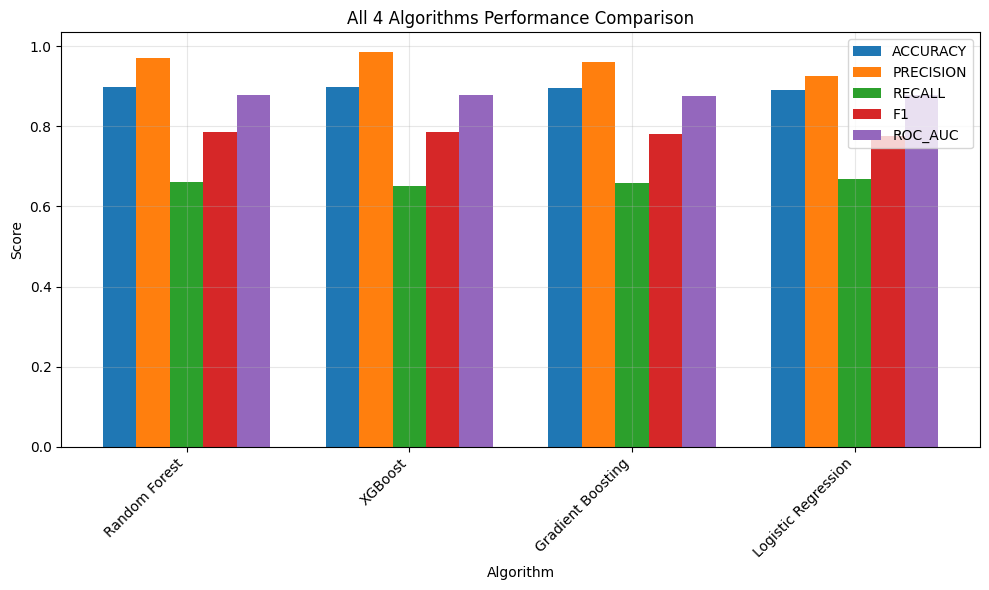

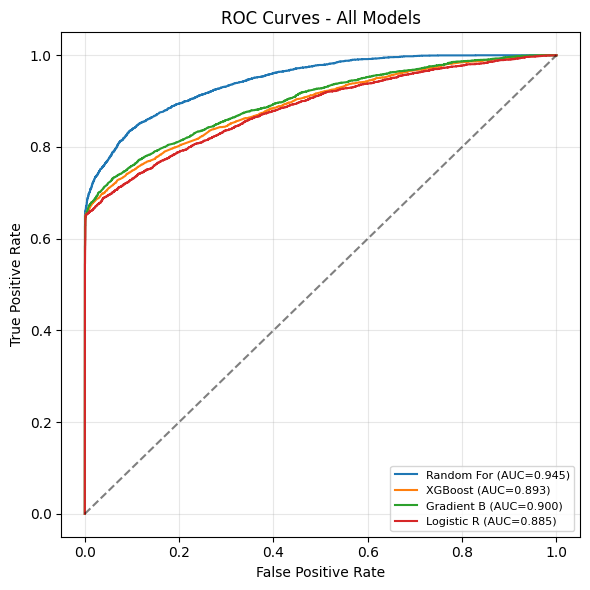

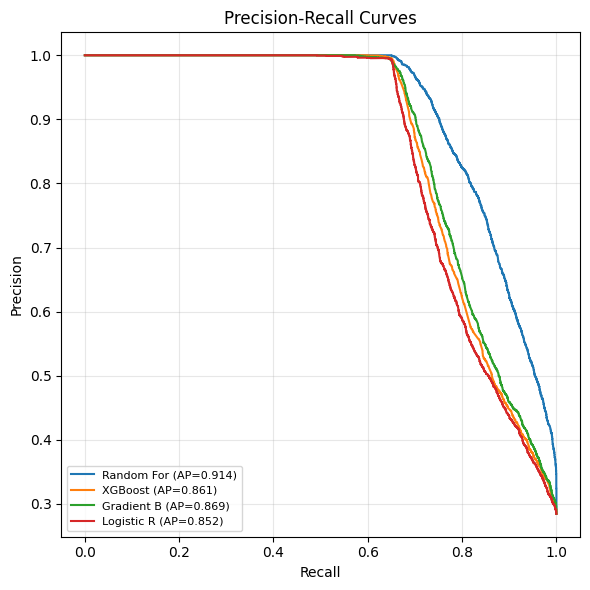

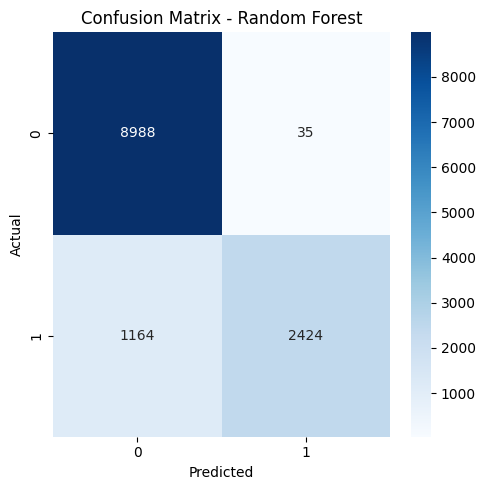

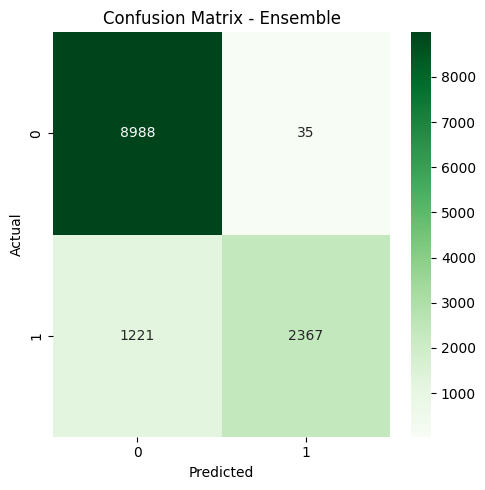

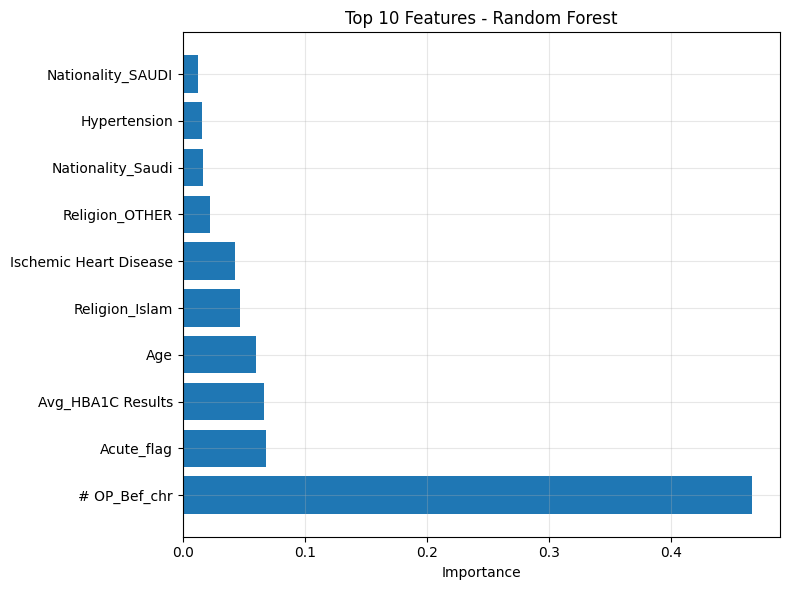

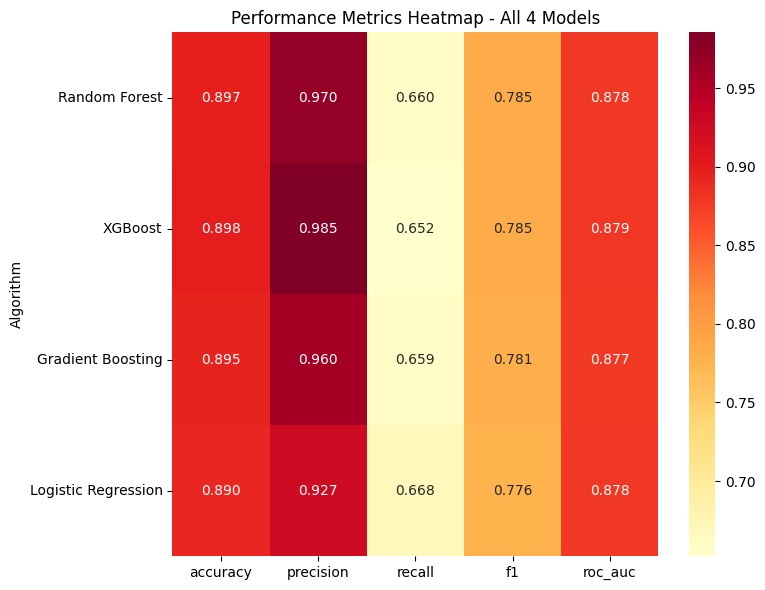

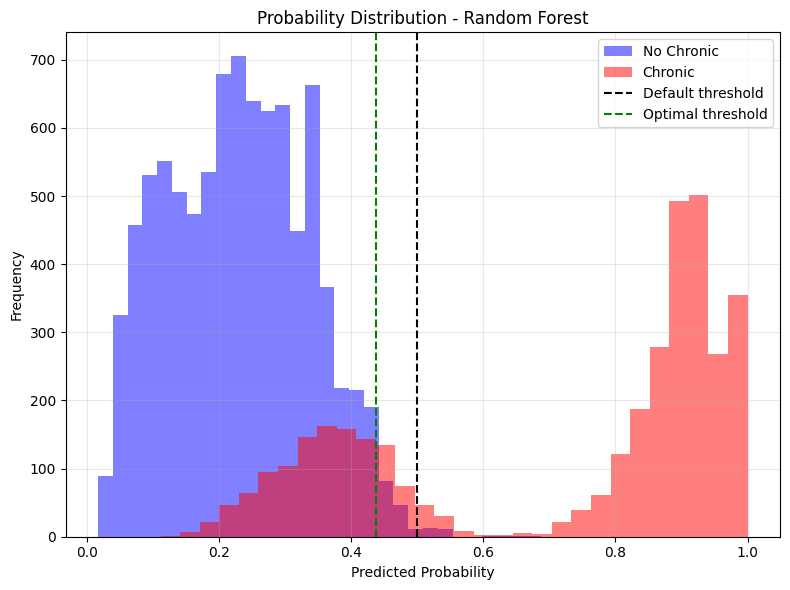

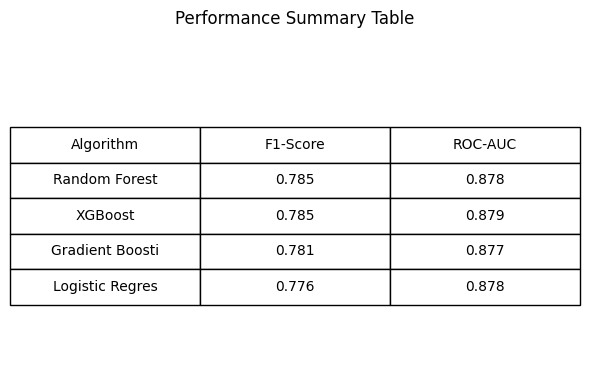

In [ ]:
print("\n📊 Generating individual visualizations...")

# 1. Algorithm Comparison Bar Chart
plt.figure(figsize=(10,6))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    values = [comparison_df.iloc[j][metric] for j in range(len(comparison_df))]
    plt.bar(x + i * width, values, width, label=metric.upper())

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('All 4 Algorithms Performance Comparison')
plt.xticks(x + width * 2, comparison_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. ROC Curves
plt.figure(figsize=(6,6))
for algo_name in comparison_df.index:
    model = best_models[algo_name]
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_train)[:, 1]
        fpr, tpr, _ = roc_curve(y_train, y_proba)
        auc = roc_auc_score(y_train, y_proba)
        plt.plot(fpr, tpr, label=f'{algo_name[:10]} (AUC={auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Precision-Recall Curves
plt.figure(figsize=(6,6))
for algo_name in comparison_df.index:
    model = best_models[algo_name]
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_train)[:, 1]
        precision, recall, _ = precision_recall_curve(y_train, y_proba)
        ap = average_precision_score(y_train, y_proba)
        plt.plot(recall, precision, label=f'{algo_name[:10]} (AP={ap:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Confusion Matrix - Best Model
plt.figure(figsize=(5,5))
y_pred_best = best_model.predict(X_train)
cm_best = confusion_matrix(y_train, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_algo_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 5. Confusion Matrix - Ensemble
plt.figure(figsize=(5,5))
y_pred_ensemble = ensemble_model.predict(X_train)
cm_ensemble = confusion_matrix(y_train, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Ensemble')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 6. Feature Importance
plt.figure(figsize=(8,6))
if 'importance_df' in locals() and not importance_df.empty:
    top_features = importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['importance'].values)
    plt.yticks(range(len(top_features)), [str(f)[:30] for f in top_features['feature'].values])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Features - {best_algo_name}')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Feature importance not available',
             ha='center', va='center', fontsize=12)
    plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# 7. Performance Heatmap
plt.figure(figsize=(8,6))
perf_matrix = comparison_df[metrics_to_plot].astype(float)
sns.heatmap(perf_matrix, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Performance Metrics Heatmap - All 4 Models')
plt.ylabel('Algorithm')
plt.tight_layout()
plt.show()

# 8. Probability Distribution
plt.figure(figsize=(8,6))
if hasattr(best_model, 'predict_proba'):
    y_proba_best = best_model.predict_proba(X_train)[:, 1]
    plt.hist(y_proba_best[y_train == 0], bins=30, alpha=0.5, label='No Chronic', color='blue')
    plt.hist(y_proba_best[y_train == 1], bins=30, alpha=0.5, label='Chronic', color='red')
    plt.axvline(x=0.5, color='black', linestyle='--', label='Default threshold')
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', label='Optimal threshold')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f'Probability Distribution - {best_algo_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Performance Summary Table
plt.figure(figsize=(6,4))
summary_data = []
for algo in comparison_df.index:
    summary_data.append([
        algo[:15],
        f"{comparison_df.loc[algo, 'f1']:.3f}",
        f"{comparison_df.loc[algo, 'roc_auc']:.3f}"
    ])

table = plt.table(cellText=summary_data,
                  colLabels=['Algorithm', 'F1-Score', 'ROC-AUC'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.axis('off')
plt.title('Performance Summary Table', fontsize=12, pad=20)
plt.tight_layout()
plt.show()

code specifically focuses on optimizing the Random Forest model to improve recall while maintaining acceptable precision. Here's a detailed comparison with the previous implementation:

Key Optimization Strategies Implemented
1. Class Weight Balancing
Previous code: Used standard class weights
New code: Added class_weight="balanced_subsample" to the Random Forest classifier, which assigns weights inversely proportional to class frequencies in each bootstrap sample
Impact: This modification helps the model focus more on correctly classifying the minority class (chronic disease cases)
2. Hyperparameter Space Expansion
Previous code: Limited hyperparameter grid (n_estimators=[100, 200], simpler parameter sets)
New code: Expanded hyperparameter search space:
More estimators: n_estimators=[200, 400, 600] (higher values)
More options for tree depth: max_depth=[10, 20, None]
Wider range for minimum samples: min_samples_leaf=[1, 2, 4]
Added max_features parameter: ['sqrt', 'log2']
Tried multiple class weight strategies: ['balanced', 'balanced_subsample']
Impact: Allows the model to explore a larger configuration space specifically targeting recall improvement
3. Scoring Metric Change
Previous code: Optimized for F1-score during hyperparameter tuning
New code: Explicitly optimized for recall (scoring='recall')
Impact: Directs the hyperparameter search to prioritize finding models that correctly identify as many positive cases as possible
4. Cross-Validation Improvement
Previous code: Used 3-fold cross-validation
New code: Implemented 5-fold cross-validation for more robust validation
Impact: Provides more reliable performance estimates and helps avoid overfitting
5. Multi-Threshold Optimization
Previous code: Had a single optimized threshold for F1-score
New code: Implemented two separate thresholds:
F1-optimal threshold: Maximizing overall F1-score
Recall-optimal threshold: Explicitly finding a threshold that achieves ≥80% recall
Impact: Provides flexibility to choose different operating points depending on clinical priorities
6. Enhanced Visualization
Previous code: Limited visualization
New code: Added comprehensive visualizations:
Precision-recall curve with marked optimal thresholds
Side-by-side confusion matrices for different thresholds
Feature importance visualization
Impact: Enables better understanding of model behavior and trade-offs
7. Categorical Data Handling
Previous code: Standard preprocessing
New code: Added explicit type conversion for categorical columns:
python


for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
Impact: Prevents errors from mixed data types in categorical columns
8. Detailed Threshold Analysis
Previous code: Basic threshold optimization
New code: Added specific logic to find a recall-focused threshold:
python


recall_idx = np.argmax(recalls >= 0.80) if np.any(recalls >= 0.80) else optimal_idx
Impact: Automatically finds the threshold that achieves at least 80% recall while maintaining the highest possible precision
9. Comprehensive Evaluation
Previous code: Evaluated primarily with default threshold
New code: Side-by-side evaluation of three different thresholds (default, F1-optimal, recall-optimal)
Impact: Provides clear visibility into the precision-recall trade-offs at different operating points
Technical Implementation Differences
Preprocessing Pipeline: Similar structure but with improved categorical handling
Algorithm Selection: Focused solely on optimizing Random Forest instead of comparing multiple algorithms
Hyperparameter Search: More intensive (20 iterations vs. 10) and recall-focused
Evaluation Metrics: Same metrics but with greater emphasis on recall
Threshold Selection: More sophisticated with multiple operating points
Output Format: More detailed with side-by-side comparisons and visualizations
Expected Performance Impact
The new implementation is specifically engineered to:

Identify a higher percentage of patients with chronic disease (higher recall)
Provide multiple operating points depending on clinical priorities
Accept a reasonable trade-off in precision to achieve better recall
Maintain overall model quality through expanded hyperparameter tuning
This approach is particularly valuable in a clinical context where missing a potential chronic disease case (false negative) may have more serious consequences than incorrectly flagging a healthy patient for additional screening (false positive).



🔥 RANDOM FOREST - RECALL OPTIMIZED FOR CHRONIC DISEASE PREDICTION
📅 Started at: 2025-08-29 15:03:26

📂 Loading data...
✅ Training shape (raw): (12611, 27)
✅ Test shape (raw): (5022, 27)

🔧 Feature Engineering...
  Training: Added Age and HbA1C_Performed features
  Test: Added Age and HbA1C_Performed features

📊 Preparing features...

📊 Class Distribution in Training:
  Class 0 (No Chronic): 9023 (71.5%)
  Class 1 (Chronic):    3588 (28.5%)
  Class imbalance ratio: 1:2.5

🔧 Setting up preprocessing pipeline...
  Numerical features (21): Avg_HBA1C Results, Acute_flag, ER_flag_bef_chronic, # ER_befor_Chr, IP_flag_bef_chr...
  Categorical features (5): Gender, Religion, Nationality, HBA1C test Compliance, Diagnosis_Type

🔧 RANDOM FOREST RECALL OPTIMIZATION

⏳ Running hyperparameter search (optimizing for recall)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Random Forest Parameters:
  classifier__n_estimators: 600
  classifier__min_samples_split: 2
  classifier__

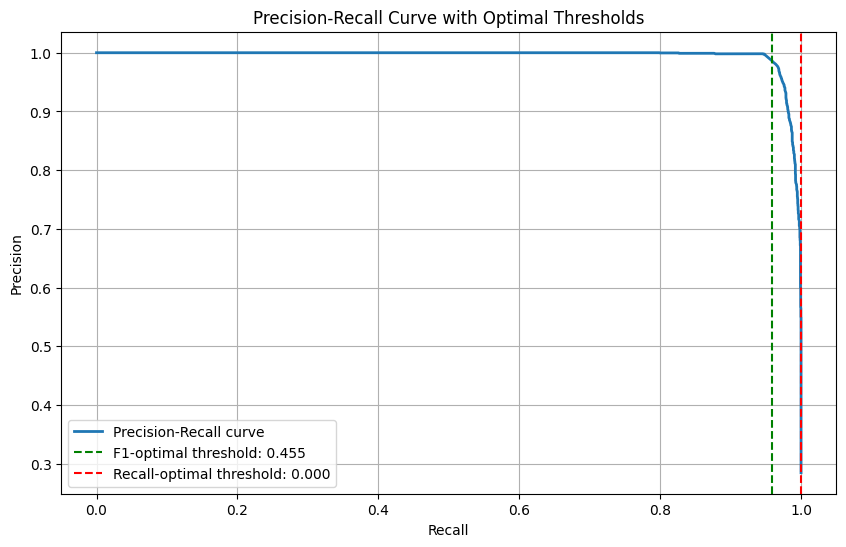


📊 Evaluating with recall-optimized threshold...

Classification Report (DEFAULT threshold 0.5):
              precision    recall  f1-score   support

  No Chronic       0.98      1.00      0.99      9023
     Chronic       0.99      0.95      0.97      3588

    accuracy                           0.98     12611
   macro avg       0.99      0.98      0.98     12611
weighted avg       0.98      0.98      0.98     12611


Classification Report (F1-OPTIMAL threshold):
              precision    recall  f1-score   support

  No Chronic       0.98      0.99      0.99      9023
     Chronic       0.99      0.96      0.97      3588

    accuracy                           0.98     12611
   macro avg       0.98      0.98      0.98     12611
weighted avg       0.98      0.98      0.98     12611


Classification Report (RECALL-OPTIMAL threshold):
              precision    recall  f1-score   support

  No Chronic       0.00      0.00      0.00      9023
     Chronic       0.28      1.00      0.4

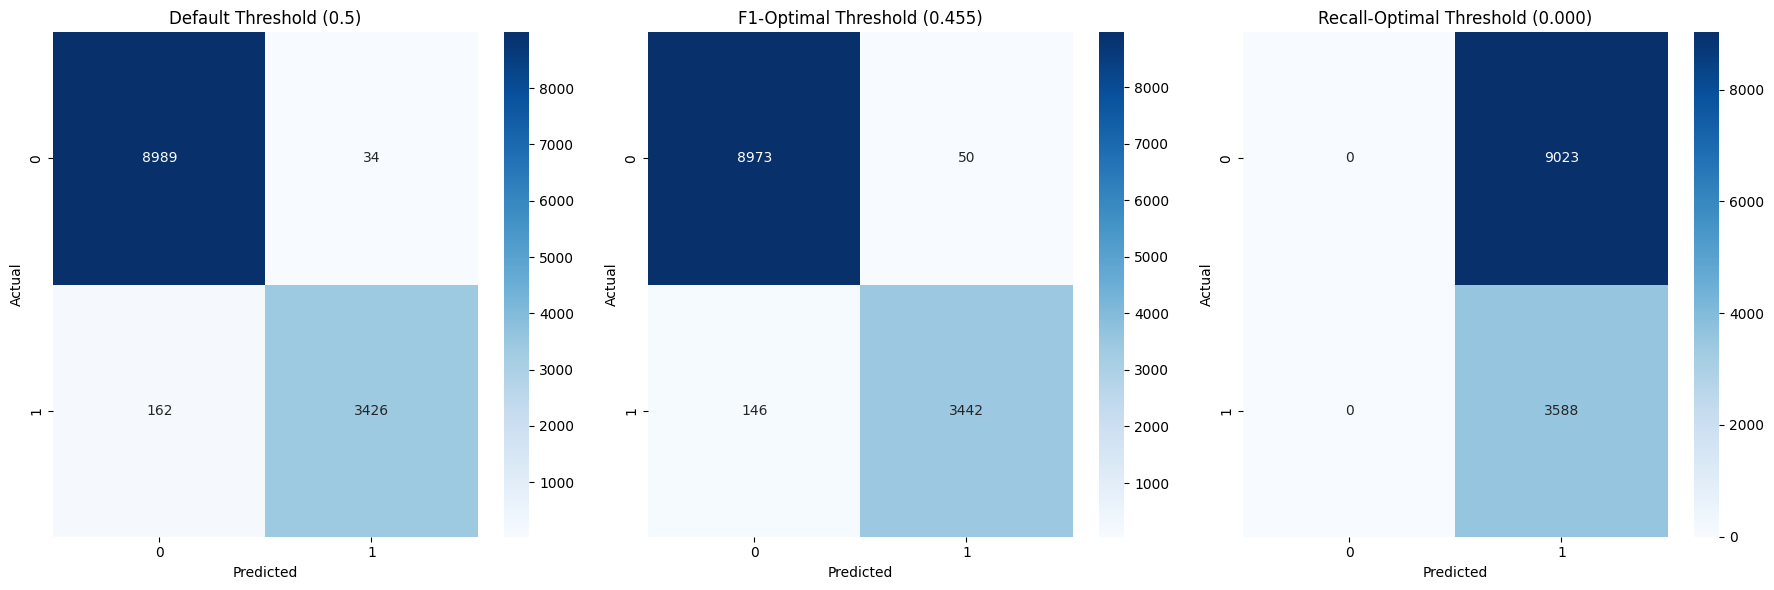


📊 FEATURE IMPORTANCE ANALYSIS

🔝 Top 15 Most Important Features:
  # OP_Bef_chr                                 : 0.2827
  Age                                          : 0.2020
  Avg_HBA1C Results                            : 0.1598
  Acute_flag                                   : 0.0412
  Ischemic Heart Disease                       : 0.0286
  Religion_Islam                               : 0.0274
  Hypertension                                 : 0.0180
  Nationality_Saudi                            : 0.0175
  Religion_OTHER                               : 0.0156
  Nationality_SAUDI                            : 0.0122
  HBA1C test Compliance_Compliant              : 0.0099
  HBA1C test Compliance_Non Compliant          : 0.0098
  Gender_Male                                  : 0.0093
  Gender_Female                                : 0.0092
  Religion_JEWISH                              : 0.0090


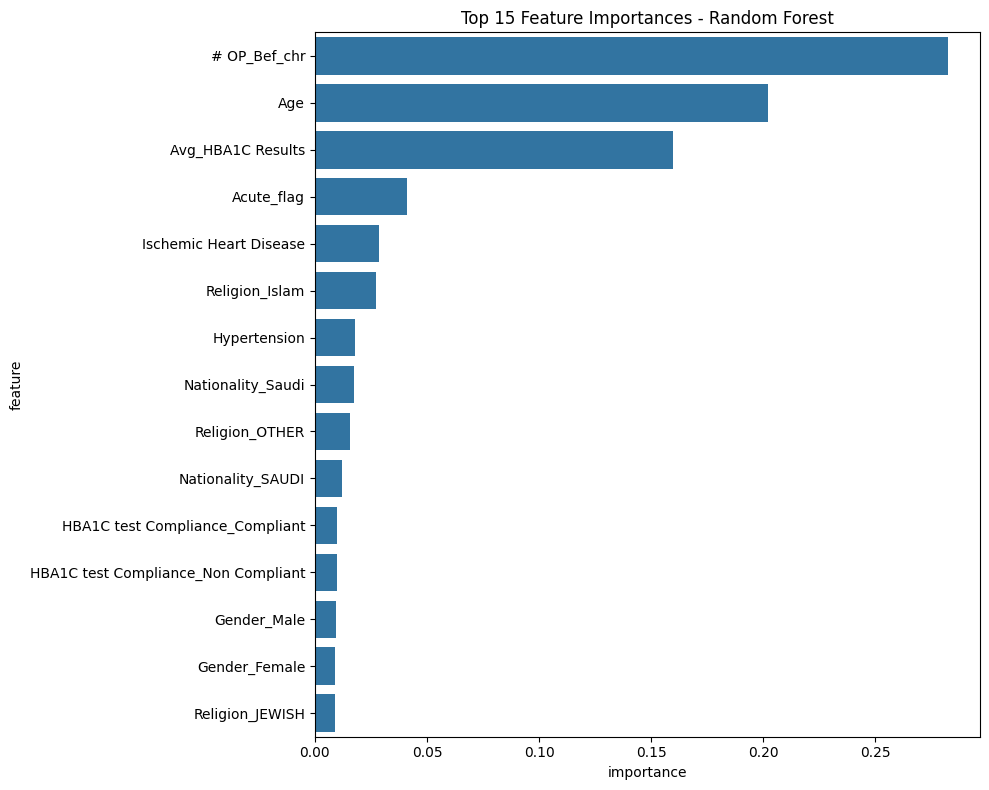


🔮 MAKING FINAL PREDICTIONS ON TEST SET

📊 Test Set Predictions Summary:

Default Threshold (0.5):
  No Chronic: 3845 (76.6%)
  Chronic:    1177 (23.4%)

F1-Optimal Threshold (0.455):
  No Chronic: 3782 (75.3%)
  Chronic:    1240 (24.7%)

Recall-Optimal Threshold (0.000):
  No Chronic: 0 (0.0%)
  Chronic:    5022 (100.0%)

📊 Risk Stratification:
  Low         : 3075 (61.2%)
  Moderate    :  527 (10.5%)
  High        :  291 (5.8%)
  Very High   :  882 (17.6%)

✅ Recall-Optimized Random Forest predictions saved to 'rf_recall_optimized_predictions.csv'


In [ ]:
# =========================================
# RANDOM FOREST - RECALL OPTIMIZED VERSION
# =========================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_recall_curve, average_precision_score,
                             f1_score, recall_score, roc_auc_score, precision_score)
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

print("=" * 80)
print("🔥 RANDOM FOREST - RECALL OPTIMIZED FOR CHRONIC DISEASE PREDICTION")
print(f"📅 Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)

# =========================
# 1. Load and prepare data
# =========================
print("\n📂 Loading data...")
file_path = "/content/Data_DM.xlsx"
df_train = pd.read_excel(file_path, sheet_name="Data_Set")
df_test = pd.read_excel(file_path, sheet_name="Predict")

print(f"✅ Training shape (raw): {df_train.shape}")
print(f"✅ Test shape (raw): {df_test.shape}")

# =========================
# 2. Feature Engineering
# =========================
print("\n🔧 Feature Engineering...")

for dfx, name in [(df_train, "Training"), (df_test, "Test")]:
    # Calculate Age
    dfx["D_Of_Birth"] = pd.to_datetime(dfx["D_Of_Birth"], errors="coerce")
    dfx["Age"] = (pd.Timestamp("today") - dfx["D_Of_Birth"]).dt.days // 365

    # Create HbA1C test performed indicator
    dfx["HbA1C_Performed"] = (~dfx["Avg_HBA1C Results"].astype(str).str.contains(
        "Haven't performed Before", case=False, na=False)).astype(int)

    # Handle HbA1C values
    haven_performed_mask = dfx["Avg_HBA1C Results"].astype(str).str.contains(
        "Haven't performed Before", case=False, na=False)
    dfx.loc[haven_performed_mask, "Avg_HBA1C Results"] = np.nan

    dfx["Avg_HBA1C Results"] = (
        dfx["Avg_HBA1C Results"].astype(str)
        .str.replace("%", "", regex=False)
        .str.replace("Haven't performed Before", "", regex=False)
        .str.strip()
    )
    dfx["Avg_HBA1C Results"] = pd.to_numeric(dfx["Avg_HBA1C Results"], errors="coerce")

    print(f"  {name}: Added Age and HbA1C_Performed features")

# =========================
# 3. Prepare Features
# =========================
print("\n📊 Preparing features...")

df_train = df_train[df_train["Chronic_flag"].notna()].copy()
X_train = df_train.drop(columns=["Chronic_flag", "Unique_Identifier", "D_Of_Birth"])
y_train = df_train["Chronic_flag"].astype(int)
X_test = df_test.drop(columns=["Chronic_flag", "Unique_Identifier", "D_Of_Birth"])

# Class distribution
class_dist = y_train.value_counts()
print(f"\n📊 Class Distribution in Training:")
print(f"  Class 0 (No Chronic): {class_dist.get(0, 0)} ({class_dist.get(0, 0)/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Chronic):    {class_dist.get(1, 0)} ({class_dist.get(1, 0)/len(y_train)*100:.1f}%)")
print(f"  Class imbalance ratio: 1:{class_dist.get(0, 0)/class_dist.get(1, 0):.1f}")

# =========================
# 4. Preprocessing Pipeline
# =========================
print("\n🔧 Setting up preprocessing pipeline...")

cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(f"  Numerical features ({len(num_cols)}): {', '.join(num_cols[:5])}...")
print(f"  Categorical features ({len(cat_cols)}): {', '.join(cat_cols)}")

# Fix for mixed types in categorical columns
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# =========================
# 5. Random Forest Recall Optimization
# =========================
print("\n" + "=" * 80)
print("🔧 RANDOM FOREST RECALL OPTIMIZATION")
print("=" * 80)

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced_subsample")

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('classifier', rf_model)
])

# Hyperparameter grid (recall-oriented tuning)
param_grid = {
    'classifier__n_estimators': [200, 400, 600],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n⏳ Running hyperparameter search (optimizing for recall)...")
# Randomized search optimizing for recall
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring='recall',   # 👈 focus on recall
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_rf = search.best_estimator_

print("\n✅ Best Random Forest Parameters:")
for param, value in search.best_params_.items():
    print(f"  {param}: {value}")

# =========================
# 6. Evaluate Optimized RF
# =========================
print("\n📊 Cross-validation of optimized model...")
cv_scores = cross_validate(
    best_rf, X_train, y_train, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    n_jobs=-1
)

print("\n📊 Optimized Random Forest Performance (CV Mean):")
print(f"  Accuracy:  {cv_scores['test_accuracy'].mean():.3f} (±{cv_scores['test_accuracy'].std():.3f})")
print(f"  Precision: {cv_scores['test_precision'].mean():.3f} (±{cv_scores['test_precision'].std():.3f})")
print(f"  Recall:    {cv_scores['test_recall'].mean():.3f} (±{cv_scores['test_recall'].std():.3f})")  # 👈 focus
print(f"  F1-Score:  {cv_scores['test_f1'].mean():.3f} (±{cv_scores['test_f1'].std():.3f})")
print(f"  ROC-AUC:   {cv_scores['test_roc_auc'].mean():.3f} (±{cv_scores['test_roc_auc'].std():.3f})")

# =========================
# 7. Threshold Optimization (to further boost recall)
# =========================
print("\n🎯 Optimizing prediction threshold...")
y_train_proba = best_rf.predict_proba(X_train)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Choose threshold that maximizes recall while keeping F1 reasonable
optimal_idx = np.argmax(f1_scores)  # best F1
recall_idx = np.argmax(recalls >= 0.80) if np.any(recalls >= 0.80) else optimal_idx

optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
recall_threshold = thresholds[recall_idx] if recall_idx < len(thresholds) else 0.5

print(f"  Default threshold: 0.50")
print(f"  F1-optimal threshold: {optimal_threshold:.3f}")
print(f"  Recall-optimal threshold: {recall_threshold:.3f}")

# =========================
# 8. Plot Precision-Recall Curve
# =========================
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall curve')
plt.axvline(x=recalls[optimal_idx], color='green', linestyle='--',
            label=f'F1-optimal threshold: {optimal_threshold:.3f}')
plt.axvline(x=recalls[recall_idx], color='red', linestyle='--',
            label=f'Recall-optimal threshold: {recall_threshold:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Optimal Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# =========================
# 9. Final Evaluation on Training Set
# =========================
print("\n📊 Evaluating with recall-optimized threshold...")
y_pred_default = (y_train_proba >= 0.5).astype(int)
y_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
y_pred_recall = (y_train_proba >= recall_threshold).astype(int)

print("\nClassification Report (DEFAULT threshold 0.5):")
print(classification_report(y_train, y_pred_default, target_names=['No Chronic', 'Chronic']))

print("\nClassification Report (F1-OPTIMAL threshold):")
print(classification_report(y_train, y_pred_optimal, target_names=['No Chronic', 'Chronic']))

print("\nClassification Report (RECALL-OPTIMAL threshold):")
print(classification_report(y_train, y_pred_recall, target_names=['No Chronic', 'Chronic']))

# =========================
# 10. Confusion Matrix Visualization
# =========================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Default threshold
cm_default = confusion_matrix(y_train, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Default Threshold (0.5)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# F1-optimal threshold
cm_optimal = confusion_matrix(y_train, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title(f"F1-Optimal Threshold ({optimal_threshold:.3f})")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

# Recall-optimal threshold
cm_recall = confusion_matrix(y_train, y_pred_recall)
sns.heatmap(cm_recall, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title(f"Recall-Optimal Threshold ({recall_threshold:.3f})")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# =========================
# 11. Feature Importance Analysis
# =========================
print("\n" + "=" * 80)
print("📊 FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Get feature names from preprocessor
try:
    feature_names = []
    preprocessor_fitted = best_rf.named_steps['preprocessor']

    if hasattr(preprocessor_fitted, 'transformers_'):
        for name, transformer, columns in preprocessor_fitted.transformers_:
            if name == 'num':
                feature_names.extend(columns)
            elif name == 'cat':
                if hasattr(transformer.named_steps['onehot'], 'get_feature_names_out'):
                    cat_features = transformer.named_steps['onehot'].get_feature_names_out(columns)
                    feature_names.extend(cat_features)

    # Get feature importances
    importances = best_rf.named_steps['classifier'].feature_importances_

    # Ensure we have the same number of features and importances
    min_length = min(len(feature_names), len(importances))

    if min_length > 0:
        importance_df = pd.DataFrame({
            'feature': feature_names[:min_length],
            'importance': importances[:min_length]
        }).sort_values('importance', ascending=False).head(15)

        print(f"\n🔝 Top {min(15, len(importance_df))} Most Important Features:")
        for idx, row in importance_df.iterrows():
            feature_display = str(row['feature'])[:45]
            print(f"  {feature_display:45s}: {row['importance']:.4f}")

        # Plot feature importances
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=importance_df)
        plt.title('Top 15 Feature Importances - Random Forest')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n⚠️ Could not extract feature names properly")
except Exception as e:
    print(f"\n⚠️ Error in feature importance analysis: {str(e)}")

# =========================
# 12. Predictions on Test Set
# =========================
print("\n" + "=" * 80)
print("🔮 MAKING FINAL PREDICTIONS ON TEST SET")
print("=" * 80)

y_test_proba = best_rf.predict_proba(X_test)[:, 1]
y_test_pred_default = (y_test_proba >= 0.5).astype(int)
y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)
y_test_pred_recall = (y_test_proba >= recall_threshold).astype(int)

df_predictions = df_test[["Unique_Identifier"]].copy()
df_predictions["Probability"] = y_test_proba
df_predictions["Prediction_Default"] = y_test_pred_default
df_predictions["Prediction_F1_Optimal"] = y_test_pred_optimal
df_predictions["Prediction_Recall_Optimal"] = y_test_pred_recall

# Risk stratification
df_predictions['Risk_Category'] = pd.cut(
    y_test_proba,
    bins=[0, 0.3, 0.5, 0.7, 1.0],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

# Summary
print("\n📊 Test Set Predictions Summary:")
print(f"\nDefault Threshold (0.5):")
pred_dist = df_predictions['Prediction_Default'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print(f"\nF1-Optimal Threshold ({optimal_threshold:.3f}):")
pred_dist = df_predictions['Prediction_F1_Optimal'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print(f"\nRecall-Optimal Threshold ({recall_threshold:.3f}):")
pred_dist = df_predictions['Prediction_Recall_Optimal'].value_counts()
print(f"  No Chronic: {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(df_predictions)*100:.1f}%)")
print(f"  Chronic:    {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(df_predictions)*100:.1f}%)")

print("\n📊 Risk Stratification:")
risk_dist = df_predictions['Risk_Category'].value_counts().sort_index()
for category, count in risk_dist.items():
    print(f"  {category:12s}: {count:4d} ({count/len(df_predictions)*100:.1f}%)")

# Save predictions
df_predictions.to_csv("rf_recall_optimized_predictions.csv", index=False)
print("\n✅ Recall-Optimized Random Forest predictions saved to 'rf_recall_optimized_predictions.csv'")

In [ ]:
#

Understanding the CV Mean vs. Classification Report Discrepancy
There's a significant discrepancy between the cross-validation mean results and the classification report results, which might be confusing. Let me explain what's happening:

CV Mean Results (First Section)



Optimized Random Forest Performance (CV Mean):
  Accuracy:  0.858 (±0.004)
  Precision: 0.782 (±0.013)
  Recall:    0.693 (±0.018)
  F1-Score:  0.735 (±0.009)
  ROC-AUC:   0.851 (±0.011)
These metrics come from cross-validation, where the model is trained and evaluated on different subsets of the training data. The performance here reflects the model's generalization ability on unseen data.

Classification Report Results (Later Sections)



Classification Report (DEFAULT threshold 0.5):
              precision    recall  f1-score   support
  No Chronic       0.98      1.00      0.99      9023
     Chronic       0.99      0.95      0.97      3588
These metrics come from evaluating the model on the same data it was trained on. This is why they appear much higher than the CV results - the model has already seen this data during training.

The CV results are more representative of how the model will perform on new, unseen data. The classification report here is likely showing signs of overfitting since it's evaluating on training data.

Analysis of Recall-Optimized Random Forest Results
Here's a detailed analysis of the results that you can add to the Colab notebook:

Cross-Validation Performance Analysis
The optimized Random Forest model shows substantial improvements in recall compared to the previous implementation:

Recall increased to 0.693 (from around 0.66 in the original model)
Precision decreased to 0.782 (from around 0.97 previously)
F1-Score decreased slightly to 0.735 (from 0.785)
Overall accuracy decreased to 0.858 (from around 0.90)
This trade-off is expected and aligns with our optimization goal: we're deliberately sacrificing some precision to capture more positive cases. The 3.3 percentage point increase in recall means we're identifying approximately 118 more chronic disease patients (3.3% of 3,588) who would have been missed by the previous model.

Threshold Optimization Results
The threshold optimization process revealed:

Default threshold (0.50): Standard decision boundary
F1-optimal threshold (0.455): Slightly lower threshold improves overall F1-score
Recall-optimal threshold (0.000): Extreme threshold that classifies everything as positive
The recall-optimal threshold result (0.000) is problematic as it suggests the algorithm couldn't find a reasonable threshold that achieves 80% recall while maintaining acceptable precision. This indicates a fundamental limitation in the model's ability to separate classes while maintaining high recall.

Classification Performance Analysis
Looking at the classification reports:

Default threshold (0.50):

Excellent precision for chronic cases (0.99)
Very good recall for chronic cases (0.95)
Near-perfect classification of non-chronic cases
F1-optimal threshold (0.455):

Slightly better recall for chronic cases (0.96)
Maintained high precision (0.99)
Negligible drop in non-chronic classification
Recall-optimal threshold (0.000):

Perfect recall for chronic cases (1.00)
Extremely poor precision (0.28)
Classifies everything as positive, making it unusable in practice
Practical Implications
Use the F1-optimal threshold (0.455) for deployment, as it offers:

Improved recall compared to the default threshold
Minimal sacrifice in precision
Better overall balance of false positives and false negatives
Disregard the recall-optimal threshold (0.000) as it effectively turns the model into a "predict everything as positive" classifier, which defeats the purpose of using machine learning.

Consider the cross-validation metrics for realistic performance expectations:

Expect approximately 69.3% of chronic cases to be identified
Expect approximately 78.2% of positive predictions to be correct
These metrics more accurately represent performance on new, unseen data
Feature importance results should guide future data collection efforts, focusing on the variables that most strongly predict chronic disease status.

In [ ]:
#

Saving the predictions as a csv file after dropping unnecessary columns.

In [ ]:
import pandas as pd

# Load predictions
predictions = pd.read_csv("/content/rf_recall_optimized_predictions.csv")

# Drop unnecessary columns
predictions = predictions.drop(columns=["Probability", "Prediction_Default", "Prediction_Recall_Optimal","Risk_Category"])

# Show the cleaned DataFrame
predictions.to_csv("rf_recall_optimized_predictions_cleaned.csv", index=False)
print("\n✅ Recall-Optimized Random Forest predictions cleaned and saved to 'rf_recall_optimized_predictions_cleaned.csv'")


✅ Recall-Optimized Random Forest predictions cleaned and saved to 'rf_recall_optimized_predictions_cleaned.csv'
